# Titanic Survival Prediction

1. Project description

This titanic problem is about the titanic ship which was called as 'Unsinkable ship', but it sinks in early 1912.

The Titanic Problem is a binary classification problem that involves predicting whether a passenger on the Titanic survived or not based on various features. The dataset contains information about multiple passengers, including their age, sex, number of siblings, embarkment point, and survival status.

The independent variables, also known as input or predictor variables, are the features of each passenger, such as Age, Sex, SibSp (number of siblings/spouses aboard), Parch (number of parents/children aboard), Fare, and Embarked. These variables are used to predict the target variable, "Survived."


1.1 # Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.2 # Importing dataset

In [2]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# checking dimension of dataset
df.shape

(891, 12)

This dataset contain 891 rows and 12 column in which 1 in target and rest 11 is independent variables.

In [4]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


1.3 # EDA (Exploratory data analysis)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [11]:
df.tail(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
876,0,3,male,20.0,0,0,9.8458,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
881,0,3,male,33.0,0,0,7.8958,S
882,0,3,female,22.0,0,0,10.5167,S
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
885,0,3,female,39.0,0,5,29.1250,Q


In [12]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [13]:
df.shape

(891, 8)

Now after droping few columns, we can see there is 891 rows and 8 column, where 1 is target and rest 7 is independent variables.

In [14]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

There are three different type of data is present here in this dataset i.e.,float64, int64, and object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


This gives brief information about the dataset which inclues columns name, non-null values, dtypes,index range, and memory usage.

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
# Lets handle missing values first, as we can see there is missing values in "age" and "embarked" columns

# use median method to handle missing values in 'age' column
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# use mode method to handle missing values in 'embarked' column
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

As we can see all the null values is handled, now visualize it 

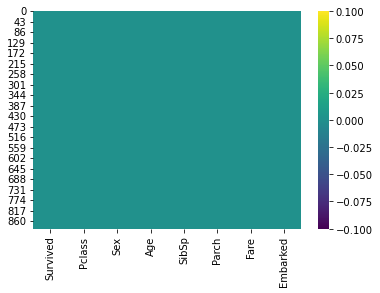

In [19]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

Ther is no missing value present as we can clearly see that.

In [20]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('\n')

Survived
0    549
1    342
Name: Survived, dtype: int64


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


Sex
male      577
female    314
Name: Sex, dtype: int64


Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64




In [21]:
for col in df.columns:
    print(col, df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Age [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8  

Description of Data

In [22]:
# Statistical summary of columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This is the statistical presentation of dataset. Here the summary of the numerical columns in the datasets looks fine as there is no missing values and negative values present.

Here's a breakdown of the output:

1.count: the number of non-null values in each column.

2.mean: the mean (average) value of each column.

3.std: the standard deviation of each column, which measures the amount of variation or dispersion from the mean.

4.min: the minimum value of each column.

5.25%: the 25th percentile of each column, which is the value below which 25% of the observations fall.

6.50%: the 50th percentile of each column, which is the median value of the column.

7.75%: the 75th percentile of each column, which is the value below which 75% of the observations fall.

8.max: the maximum value of each column.

From this summary, we can get a quick overview of the distribution of the data in each numerical column, such as the range of values, the central tendency, and the degree of variability.

# Data visualization

Graphical Analysis

Univariate

lets visualize numerical column with histogram plot

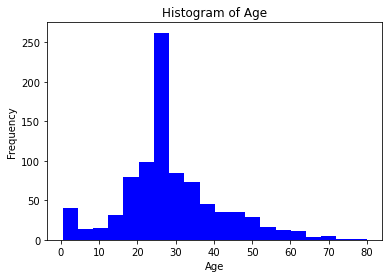

In [23]:
# Lets visualize "age" column 

# Create histogram plot
plt.hist(df['Age'], bins=20, color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

Here in this histogram, we can see that the majority of the passengers were between the ages of 20 and 40, with a smaller number of passengers in the younger and older age groups.We can all see that there is some right-skewness in the distribution, as there is a longer tail towards the higher age values. This means that the distribution is not perfectly symmetrical, and the mean age may be higher than the median age.

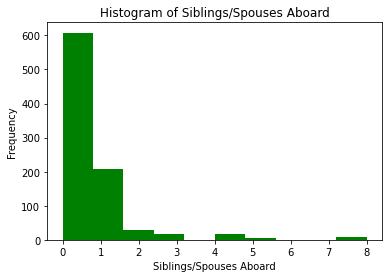

In [24]:
# Lets visualize "SibSp" column

# Create histogram plot
plt.hist(df['SibSp'], bins=10, color='green')

# Add labels and title
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Frequency')
plt.title('Histogram of Siblings/Spouses Aboard')

# Show plot
plt.show()

Here in this plot we can clearly see that the majority of the passengers had either 0 or 1 siblings/spouses aboard the Titanic. There were relatively few passengers with 2 or more siblings/spouses, and almost no passengers with 5 or more siblings/spouses. The distribution of the data is skewed to the right, which means that most of the data is concentrated towards the lower end of the range of values. We can see few outliers too.

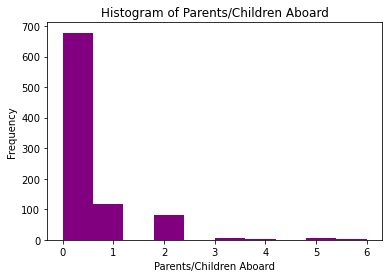

In [25]:
# lets visualize the "Parch" column

# Create histogram plot
plt.hist(df['Parch'], bins=10, color='purple')

# Add labels and title
plt.xlabel('Parents/Children Aboard')
plt.ylabel('Frequency')
plt.title('Histogram of Parents/Children Aboard')

# Show plot
plt.show()

Her in this plot we can see that most of the passengers did not have any parents or children aboard the Titanic. There is also a small peak at the value 1, which means that some passengers had one parent or child aboard. The number of passengers with more than one parent or child aboard rapidly decreases as the number increases.

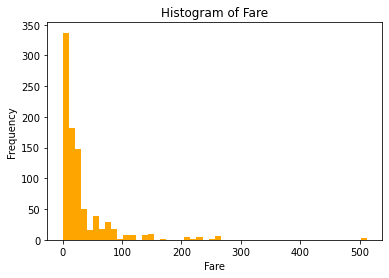

In [26]:
# Lets visualize the "Fare" column

# Create histogram plot
plt.hist(df['Fare'], bins=50, color='orange')

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')

# Show plot
plt.show()

Here in this plot, we can see that the majority of passengers had lower ticket fares, with only a few passengers paying very high fares. The distribution is right-skewed, with a long tail towards the higher fares. This indicates that most passengers were travelling in lower class cabins and only a few were in higher class cabins with expensive tickets. Additionally, we can also see the presence of outliers in the dataset with some passengers paying very high fares.

Lets visualize numerical column with box plot now

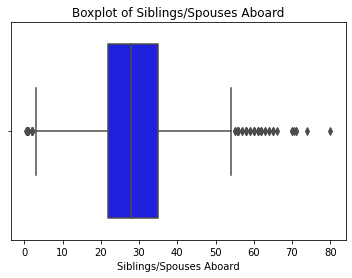

In [27]:
# lets visualize "Age"

sns.boxplot(x=df['Age'], color='blue')

# Add labels and title
plt.xlabel('Siblings/Spouses Aboard')
plt.title('Boxplot of Siblings/Spouses Aboard')
plt.show()

As we can clearly see outliers present here in the "Age" column

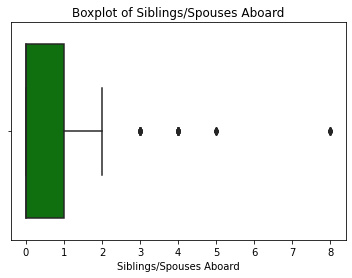

In [28]:
# lets visualize "SibSp" column

sns.boxplot(x=df['SibSp'], color='green')

# Add labels and title
plt.xlabel('Siblings/Spouses Aboard')
plt.title('Boxplot of Siblings/Spouses Aboard')
plt.show()

Here in "SibSp" column, presence of few outliers can be seen

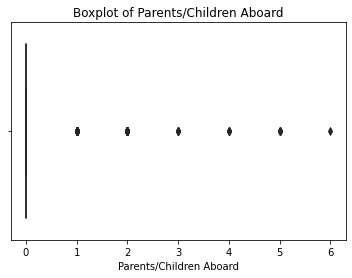

In [29]:
# lets visualize the "Parch" column

sns.boxplot(x=df['Parch'], color='purple')
plt.xlabel('Parents/Children Aboard')
plt.title('Boxplot of Parents/Children Aboard')
plt.show()

Here also outliers are present

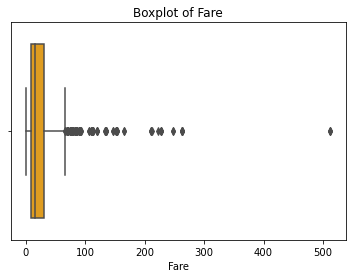

In [30]:
# lets visualize the "Fare" column

sns.boxplot(x=df['Fare'], color='orange')
plt.xlabel('Fare')
plt.title('Boxplot of Fare')
plt.show()

Here also we can see the outliers presence in this column too

Lets visualize the categorical column by barplot

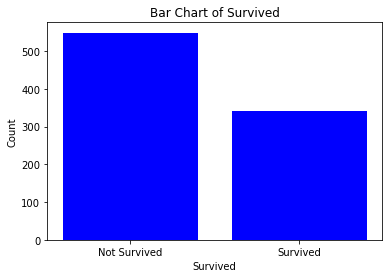

In [31]:
# Lets visualize "survived" column

# Create bar plot
survived_counts = df['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values, color='blue')

# Add labels and title
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar Chart of Survived')
plt.show()

Here in this case, we can see the bar plot shows that a higher number of passengers did not survive the disaster compared to those who survived it.

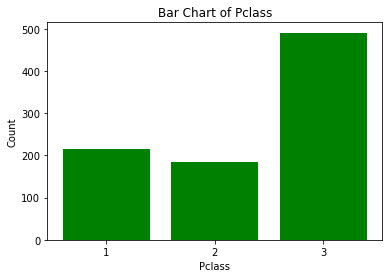

In [32]:
# Lets visualize "Pclass" column

# Create bar plot
pclass_counts = df['Pclass'].value_counts()
plt.bar(pclass_counts.index, pclass_counts.values, color='green')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Bar Chart of Pclass')
plt.xticks([1, 2, 3])
plt.show()

We can see that the majority of the passengers were in the 3rd class, followed by the 1st and then the 2nd class. This gives us an idea of the distribution of passengers across different classes on the Titanic.

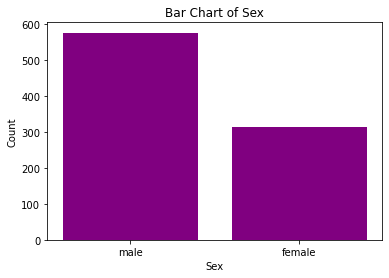

In [33]:
# Lets visualize the "Sex" column

# Create bar plot
sex_counts = df['Sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color='purple')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Chart of Sex')
plt.show()

We can see in this plot that, there were more male passengers than female passengers on the Titanic. The plot clearly shows that the count of male passengers is almost twice as much as the count of female passengers.

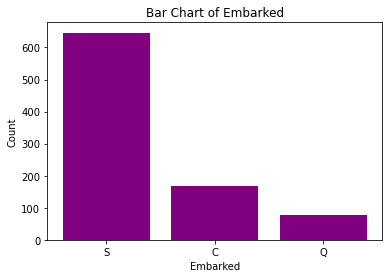

In [34]:
# Lets visualize the "Embarked" column

# Create bar plot
embarked_counts = df['Embarked'].value_counts()
plt.bar(embarked_counts.index, embarked_counts.values, color='purple')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Bar Chart of Embarked')
plt.show()

"Embarked" refers to the port of embarkation, i.e., the port where a passenger boarded the Titanic. In this dataset, it is represented by a single character code:

C = Cherbourg
Q = Queenstown (now known as Cobh)
S = Southampton

From the plot, we can see that most of the passengers embarked from Southampton ("S"), followed by Cherbourg ("C") and Queenstown ("Q").

Bivariate Analysis

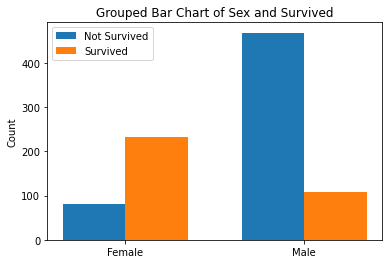

In [35]:
# Lets analyze relationship between "Sex & Survived" by grouped bar plot

# Count the number of male and female passengers who survived and did not survive
survived_by_sex = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()

# Create a grouped bar plot
width = 0.35
fig, ax = plt.subplots()
ax.bar(np.arange(2)-width/2, survived_by_sex[0], width, label='Not Survived')
ax.bar(np.arange(2)+width/2, survived_by_sex[1], width, label='Survived')

# Add labels and title
ax.set_xticks([0,1])
ax.set_xticklabels(['Female', 'Male'])
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart of Sex and Survived')
ax.legend()

# Show plot
plt.show()

Here in this plot,it appears that more females survived the disaster than males, as the orange bar for females is higher than that of males.

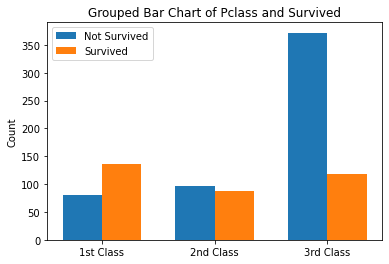

In [36]:
# Lets analyze relationship between "Pclass & Survived" by grouped bar plot

# Count the number of passengers who survived and did not survive for each Pclass
survived_by_pclass = df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack()

# Create a grouped bar plot
width = 0.35
fig, ax = plt.subplots()
ax.bar(np.arange(3)-width/2, survived_by_pclass[0], width, label='Not Survived')
ax.bar(np.arange(3)+width/2, survived_by_pclass[1], width, label='Survived')

# Add labels and title
ax.set_xticks([0,1,2])
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart of Pclass and Survived')
ax.legend()

# Show plot
plt.show()

This plot shows that the majority of passengers in the 1st class survived, while the majority of passengers in the 3rd class did not survive. The 2nd class had a relatively equal distribution of passengers who survived and did not survive.

Overall this plots shows that the Pclass is a significant predictor of survival on the Titanic.

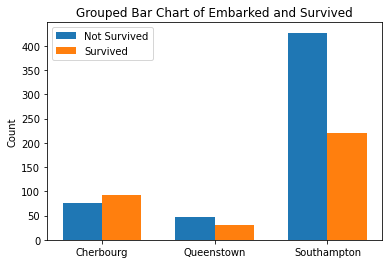

In [37]:
# Analyze relationship between "Embarked & Survived" by grouped bar plot

# Count the number of passengers who survived and did not survive for each Embarked category
survived_by_embarked = df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack()

# Create a grouped bar plot
width = 0.35
fig, ax = plt.subplots()
ax.bar(np.arange(3)-width/2, survived_by_embarked[0], width, label='Not Survived')
ax.bar(np.arange(3)+width/2, survived_by_embarked[1], width, width, label='Survived')

# Add labels and title
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart of Embarked and Survived')
ax.legend()

# Show plot
plt.show()

Here in this plot we can see that in all three categories, the number of passengers who did not survive is higher than the number of passengers who survived.

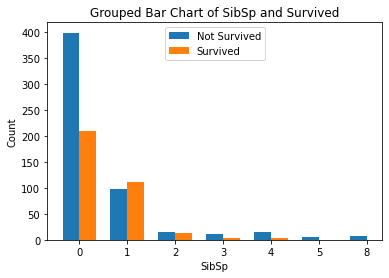

In [38]:
# Analyze the relationship between "SibSp and Survived" by grouped bar plot

# Count the number of passengers who survived and did not survive for each SibSp value
survived_by_sibsp = df.groupby(['SibSp', 'Survived'])['Survived'].count().unstack()

# Create a grouped bar plot
width = 0.35
fig, ax = plt.subplots()
ax.bar(np.arange(7)-width/2, survived_by_sibsp[0], width, label='Not Survived')
ax.bar(np.arange(7)+width/2, survived_by_sibsp[1], width, label='Survived')

# Add labels and title
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['0','1','2','3','4','5','8'])
ax.set_ylabel('Count')
ax.set_xlabel('SibSp')
ax.set_title('Grouped Bar Chart of SibSp and Survived')
ax.legend()

# Show plot
plt.show()

Here from this plot, we can see that passengers with no siblings/spouses aboard (SibSp=0) have the highest count of both survivors and non-survivors. The count of survivors decreases as the SibSp value increases. Passengers with SibSp values of 3, 4, 5, and 8 have the lowest count of both survivors and non-survivors.

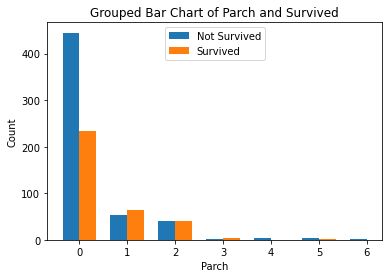

In [39]:
# Analyze the relationship between "Parch and Survived" by grouped bar plot

# Count the number of passengers who survived and did not survive for each Parch value
survived_by_parch = df.groupby(['Parch', 'Survived'])['Survived'].count().unstack()

# Create a grouped bar plot
width = 0.35
fig, ax = plt.subplots()
ax.bar(np.arange(7)-width/2, survived_by_parch[0], width, label='Not Survived')
ax.bar(np.arange(7)+width/2, survived_by_parch[1], width, label='Survived')

# Add labels and title
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['0','1','2','3','4','5','6'])
ax.set_ylabel('Count')
ax.set_xlabel('Parch')
ax.set_title('Grouped Bar Chart of Parch and Survived')
ax.legend()

# Show plot
plt.show()

This plot shows that passengers with 0 or 1 Parch had a higher chance of survival compared to those with higher values of Parch. 

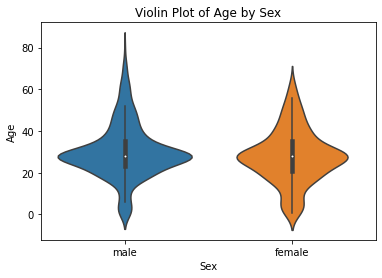

In [40]:
# Analyze the relationship between "Age and Sex" by violin plot

# Create a violin plot
sns.violinplot(x="Sex", y="Age", data=df)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Sex')

# Show plot
plt.show()

Here in this plot, we can see that the distribution of ages for males and females is similar, with the median age for both. However, there are more younger males than females, as evidenced by the wider part of the violin on the left side of the plot for males. There are also slightly more older females than males, as evidenced by the wider part of the violin on the right side of the plot for females.

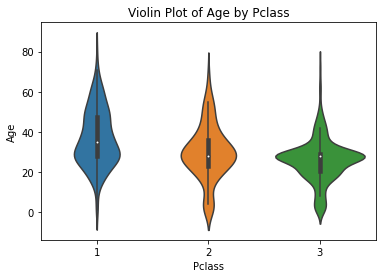

In [41]:
# Analyze the relationship between "Age and Pclass" by violin plot

sns.violinplot(x="Pclass", y="Age", data=df)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Pclass')
plt.show()

Here in this plot,we can see from that the median age for 1st class passengers is higher than for 2nd and 3rd class passengers, and the age distribution for 3rd class passengers is more spread out than for 1st and 2nd class passengers.

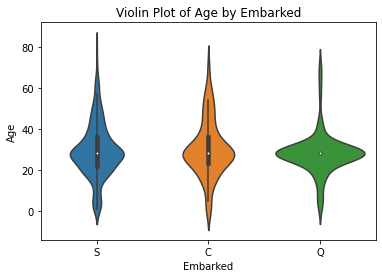

In [42]:
# Analyze the relationship between "Age and Embarked" by violin plot

sns.violinplot(x="Embarked", y="Age", data=df)
plt.xlabel('Embarked')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Embarked')
plt.show()

From this above plot, we can see that passengers who embarked at Cherbourg tend to be slightly older on average than those who embarked at the other two ports. This plot also shows that there were very few passengers under the age of 20 who embarked at Queenstown, and that the age distribution of passengers who embarked at Southampton is fairly evenly spread out.

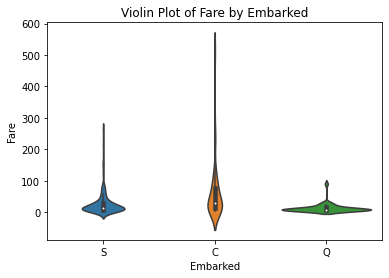

In [43]:
# Analyze the relationship between "Fare and Embarked" by violin plot

sns.violinplot(x="Embarked", y="Fare", data=df)
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.title('Violin Plot of Fare by Embarked')
plt.show()

Here in this plot we can observe that the distribution of fare is different for passengers who embarked from different ports. Passengers who embarked from Cherbourg generally paid a higher fare than passengers who embarked from Queenstown and Southampton. The distribution fare for other two is almost similar. We can also see some outliers in each of the three distributions, which represent passengers who paid a much higher fare than the majority of the passengers.

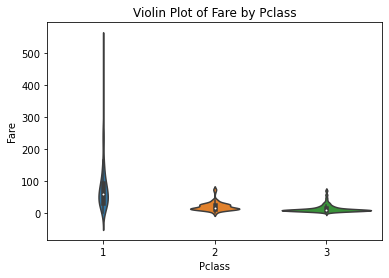

In [44]:
# Analyze the relationship between "Fare and Pclass" by violin plot

sns.violinplot(x="Pclass", y="Fare", data=df)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Violin Plot of Fare by Pclass')
plt.show()

Here in this plot we can observe that the median fare paid for first class passengers is higher than second class passengers and second class passengers paid more than third class passengers. We can also observe that there is a larger spread of fares for first class passengers as compared to the other two classes

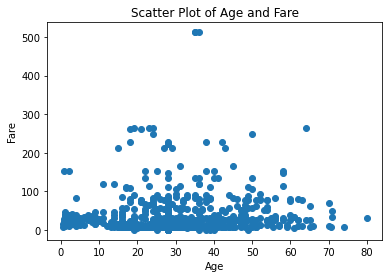

In [45]:
# Analyze the relationship between "Age and Fare" by scatter plot

# Create a scatter plot
plt.scatter(df['Age'], df['Fare'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age and Fare')
plt.show()

This plot indicates that there is no clear relationship between Age and Fare. However, we can observe that the majority of passengers were younger than 50 years old and paid a fare of less than $100. There are some outliers that paid higher fares and were older in age.

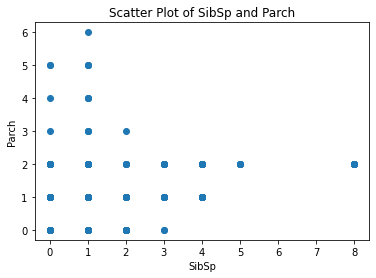

In [46]:
# Analyze the relationship between "SibSp and Parch" by scatter plot

plt.scatter(df['SibSp'], df['Parch'])
plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.title('Scatter Plot of SibSp and Parch')
plt.show()

Here in this scatter plot of SibSp and Parch, there does not seem to be a clear relationship or clustering of data points. This indicates that there may not be a strong correlation between these two variables.

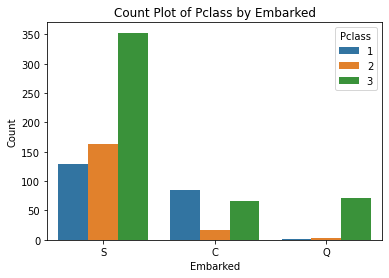

In [47]:
# Analyze the relationship between "Pclass and Embarked" by count plot

# Create a countplot
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Count Plot of Pclass by Embarked')
plt.show()

Here in this plot we can see that the majority of passengers embarked from port S, followed by port C and Q. We can also see that the majority of passengers in all three ports belonged to the third class, with the first and second classes being a relatively small proportion in comparison. 

Multivariate analysis

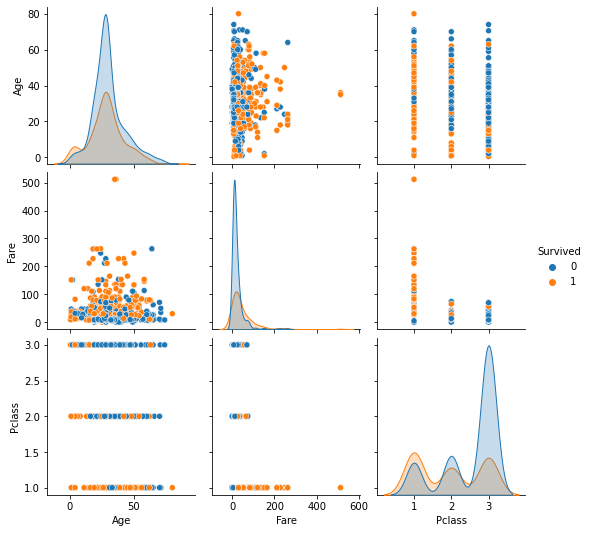

In [48]:
# lets analyze the relationship more clearly with multivariate analysis by pair plot
sns.pairplot(data=df, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.show()

Looking at this plot, we can see that passengers who paid a higher fare were more likely to survive. Similarly, passengers who were in a higher class (1st class) were also more likely to survive. There does not appear to be a clear relationship between age and survival.

# Checking outliers

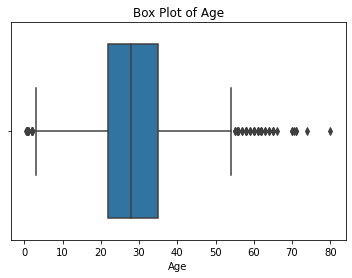

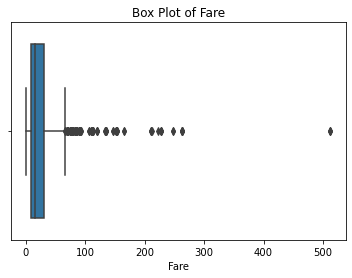

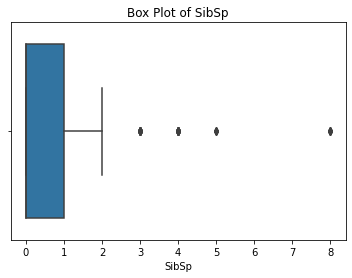

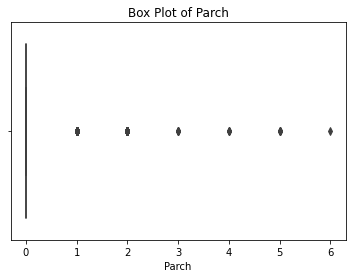

In [49]:
# Lets check the outliers by boxplot

# Select numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Create box plots for numerical columns
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [50]:
from scipy.stats import zscore

# Select numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Calculate z-scores for numerical columns
z_scores = df[num_cols].apply(zscore)

# Create a boolean array to identify outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each numerical column
for col in num_cols:
    print(f"Number of outliers in {col}: {outliers[col].sum()}")

Number of outliers in Age: 7
Number of outliers in Fare: 20
Number of outliers in SibSp: 30
Number of outliers in Parch: 15


# Checking for skewness

In [51]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [52]:
# Removing Skewness
from sklearn.preprocessing import PowerTransformer

# apply Yeo-Johnson transformation to all columns except Survived
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
pt = PowerTransformer(method='yeo-johnson')
df[columns] = pt.fit_transform(df[columns])

# round the transformed Survived values to the nearest integer
df['Survived'] = df['Survived'].round().astype(int)

In [53]:
df.skew()

Survived    0.478523
Pclass     -0.441438
Age         0.074644
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
dtype: float64

In [54]:
df.dtypes

Survived      int64
Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

# Encoding Categorical Columns

In [55]:
df.dtypes

Survived      int64
Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [56]:
# Select categorical columns
cat_cols = ['Sex', 'Embarked']

# Apply one-hot encoding to each categorical column
for col in cat_cols:
    one_hot = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, one_hot], axis=1)
    df.drop(col, axis=1, inplace=True)

In [57]:
df.dtypes

Survived        int64
Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [58]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.863973,-0.523388,1.373636,-0.560253,-0.878820,0,1,0,0,1
1,1,-1.459129,0.685109,1.373636,-0.560253,1.336651,1,0,1,0,0
2,1,0.863973,-0.208093,-0.679850,-0.560253,-0.790065,1,0,0,0,1
3,1,-1.459129,0.468033,1.373636,-0.560253,1.067352,1,0,0,0,1
4,0,0.863973,0.468033,-0.679850,-0.560253,-0.774439,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.592604,-0.130855,-0.679850,-0.560253,-0.294907,0,1,0,0,1
887,1,-1.459129,-0.767474,-0.679850,-0.560253,0.527906,1,0,0,0,1
888,0,0.863973,-0.054196,1.373636,1.846856,0.288885,1,0,0,0,1
889,1,-1.459129,-0.208093,-0.679850,-0.560253,0.527906,0,1,1,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(5), int64(1), uint8(5)
memory usage: 46.2 KB


In [60]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,-2.083381e-16,-1.562536e-16,3.282073e-16,1.417995e-16,3.379265e-16,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,-1.459129e+00,-2.600622e+00,-6.798500e-01,-5.602530e-01,-3.534079e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.926039e-01,-5.233882e-01,-6.798500e-01,-5.602530e-01,-7.919073e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.639733e-01,-5.419603e-02,-6.798500e-01,-5.602530e-01,-1.891020e-01,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,8.639733e-01,4.680326e-01,1.373636e+00,-5.602530e-01,5.594584e-01,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,8.639733e-01,3.452635e+00,1.780003e+00,1.874016e+00,2.971192e+00,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Between Target Vriable and Independent Variables

In [61]:
# Checking correlation between the target & independent variables

correlations = df.corr()
print(correlations)

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.339676 -0.074320  0.102822  0.145867  0.326914   
Pclass     -0.339676  1.000000 -0.320702 -0.060728 -0.029803 -0.615944   
Age        -0.074320 -0.320702  1.000000 -0.180575 -0.287370  0.088624   
SibSp       0.102822 -0.060728 -0.180575  1.000000  0.437774  0.400202   
Parch       0.145867 -0.029803 -0.287370  0.437774  1.000000  0.368827   
Fare        0.326914 -0.615944  0.088624  0.400202  0.368827  1.000000   
Sex_female  0.543351 -0.135754 -0.083023  0.200096  0.249345  0.264282   
Sex_male   -0.543351  0.135754  0.083023 -0.200096 -0.249345 -0.264282   
Embarked_C  0.168240 -0.221160  0.028417  0.024543  0.030665  0.253633   
Embarked_Q  0.003650  0.229713 -0.024705 -0.052231 -0.098109 -0.155930   
Embarked_S -0.149683  0.049187 -0.009348  0.011369  0.034876 -0.124067   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.543351 -0.543351    0.16

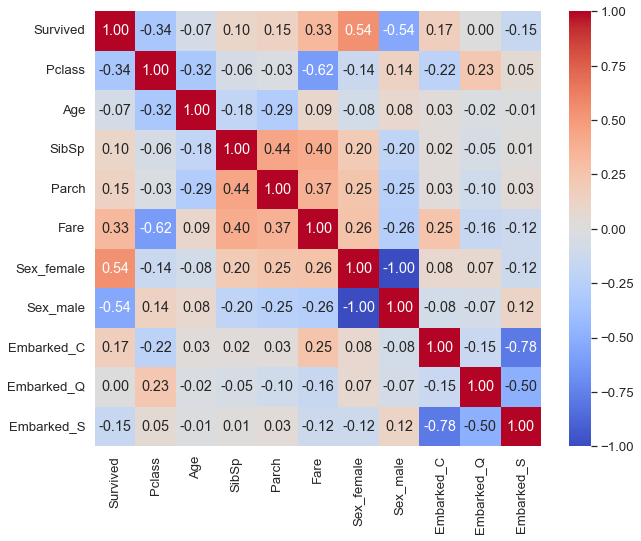

In [62]:
# Lets visualize correlation matrix by using heatmap

# Set the figure size and font size
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

# Plot the heatmap with clear font size inside and dark color
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()


# Seperating Target and Features

In [63]:
# Separate the target variable from the features
X = df.drop('Survived', axis=1)
y = df['Survived']

In [64]:
print("Feature variables: ", list(X.columns))
print("Target variable: ", y.name)

Feature variables:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Target variable:  Survived


In [65]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (891, 10)
Shape of y: (891,)


# Feature Scaling

In [66]:
# Apply feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.000000,0.343160,0.8348,0.000000,0.408170,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.542804,0.8348,0.000000,0.748736,1.0,0.0,1.0,0.0,0.0
2,1.000000,0.395247,0.0000,0.000000,0.421814,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.506943,0.8348,0.000000,0.707339,1.0,0.0,0.0,0.0,1.0
4,1.000000,0.506943,0.0000,0.000000,0.424216,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.373003,0.408006,0.0000,0.000000,0.497930,0.0,1.0,0.0,0.0,1.0
887,0.000000,0.302837,0.0000,0.000000,0.624414,1.0,0.0,0.0,0.0,1.0
888,1.000000,0.420670,0.8348,0.988843,0.587672,1.0,0.0,0.0,0.0,1.0
889,0.000000,0.395247,0.0000,0.000000,0.624414,0.0,1.0,1.0,0.0,0.0


# Variance Inflation Factor(VIF)

In [67]:
# finding VIF in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor

# create dataframe for VIF scores
vif_df = pd.DataFrame(columns=['feature', 'VIF'])

# loop through all columns and calculate VIF score
for i in range(X_scaled.shape[1]):
    vif = variance_inflation_factor(X_scaled, i)
    vif_df.loc[i] = [X.columns[i], vif]

print(vif_df.sort_values(by='VIF', ascending=True))

      feature       VIF
1         Age  1.253773
2       SibSp  1.414268
3       Parch  1.494603
0      Pclass  2.004113
4        Fare  2.354440
5  Sex_female       inf
6    Sex_male       inf
7  Embarked_C       inf
8  Embarked_Q       inf
9  Embarked_S       inf


Here in this case, the features with infinite VIF are binary categorical variables, which means that they are not continuous and do not have a meaningful VIF value. So, we do not need to remove them. We can simply ignore their VIF values and focus on the VIF values of the continuous features.

In [68]:
# Checking value count of target variables

y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Best Random State

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variables
X = df.drop('Survived', axis=1)
y = df['Survived']

# Initialize variables to store the best accuracy score and corresponding random state
best_score = 0
best_state = 0

# Loop through different random states
for state in range(1, 101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()

    # Train the models on the training data
    lr.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Test the models on the testing data and get the accuracy scores
    lr_score = accuracy_score(y_test, lr.predict(X_test))
    dt_score = accuracy_score(y_test, dt.predict(X_test))
    rf_score = accuracy_score(y_test, rf.predict(X_test))

    # Get the maximum accuracy score and corresponding random state
    if lr_score > best_score:
        best_score = lr_score
        best_state = state
        best_model = 'Logistic Regression'
    if dt_score > best_score:
        best_score = dt_score
        best_state = state
        best_model = 'Decision Tree Classifier'
    if rf_score > best_score:
        best_score = rf_score
        best_state = state
        best_model = 'Random Forest Classifier'

print(f'Best accuracy score: {best_score}')
print(f'Best model: {best_model}')
print(f'Max random state: {best_state}')

Best accuracy score: 0.8715083798882681
Best model: Random Forest Classifier
Max random state: 49


In [70]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 10)
(268, 10)
(623,)
(268,)


# Oversampling

In [72]:
from imblearn.over_sampling import RandomOverSampler

# separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# initialize random oversampler with sampling_strategy set to 'auto'
ros = RandomOverSampler(sampling_strategy='auto')

# fit and apply random oversampling to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# check the value counts of the resampled target variable
print(y_resampled.value_counts())

0    549
1    549
Name: Survived, dtype: int64


# Modelling

Classification Algorithms

In [73]:
# Import Necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression(LR)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize and train model
model = LogisticRegression(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7985074626865671
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       178
           1       0.68      0.74      0.71        90

    accuracy                           0.80       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.80      0.80      0.80       268



Accuracy score of this model is 80%

# Decision Tree Classifier(DTC) 

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
model = DecisionTreeClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7649253731343284
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       178
           1       0.63      0.72      0.67        90

    accuracy                           0.76       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.78      0.76      0.77       268



Accuracy score of this model is 76.5%

# Random Forest Classifier(RFC)

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8470149253731343
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       178
           1       0.76      0.80      0.78        90

    accuracy                           0.85       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.85      0.85      0.85       268



Accuracy score of this model is 84.7%

# Naive Bayes- (GaussianNB)

In [77]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7761194029850746
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       178
           1       0.64      0.74      0.69        90

    accuracy                           0.78       268
   macro avg       0.75      0.77      0.76       268
weighted avg       0.79      0.78      0.78       268



Accuract score of this model is 77.6%

# Extra Tree Classifier(ETC)

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train model
model = ExtraTreesClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8432835820895522
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       178
           1       0.75      0.80      0.77        90

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.85      0.84      0.84       268



Accuracy score of this model is 84.3%

# Gradient Boost Classifier(GBC)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train model
model = GradientBoostingClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.832089552238806
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       178
           1       0.75      0.74      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



Accuracy score of this model is 83.2%

# Ada Boost Classifier(ABC)

In [80]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train model
model = AdaBoostClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8208955223880597
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       178
           1       0.71      0.78      0.74        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.83      0.82      0.82       268



Accuracy score of this model is 82%

# Bagging Classifier

In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=100, random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8432835820895522
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       178
           1       0.77      0.77      0.77        90

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



Accuracy score of this model is 84.3%

# K-Nearest Neighbors(KNN)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8432835820895522
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       178
           1       0.78      0.74      0.76        90

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



Accuracy score of this model is 84.3%

# Support Vector Mechanism (SVC)

In [83]:
from sklearn.svm import SVC

# Initialize and train model
model = SVC(kernel='linear', random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7835820895522388
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       178
           1       0.67      0.69      0.68        90

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



Accuracy score od this model is 78.3%

# Cross Validation Score

In [84]:
from sklearn.model_selection import cross_val_score

# checking cv score for lr 
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

lr_cv_score = cross_val_score(lr_cv, X_train, y_train, cv=5)
print("Cross Validation Score:", lr_cv_score)
print("Mean CV Score:", np.mean(lr_cv_score))

predlr_cv = lr_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predlr_cv))
print("Classification Report:\n", classification_report(y_test, predlr_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predlr_cv) - np.mean(lr_cv_score))

Cross Validation Score: [0.84       0.776      0.776      0.77419355 0.75      ]
Mean CV Score: 0.7832387096774195
Accuracy: 0.7985074626865671
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       178
           1       0.68      0.74      0.71        90

    accuracy                           0.80       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.80      0.80      0.80       268

Difference between accuracy score and cross-validation score is: 0.015268753009147651


In [85]:
# checking cv score for dtc
model = DecisionTreeClassifier(random_state=49)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.768      0.752      0.712      0.79032258 0.73387097]
Mean CV Score: 0.7512387096774193
Accuracy: 0.7649253731343284
Difference between accuracy score and cross-validation score is: 0.013686663456909054


In [86]:
# checking cv score for rfc
model = RandomForestClassifier(n_estimators=100, random_state=49)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.816      0.76       0.776      0.80645161 0.73387097]
Mean CV Score: 0.7784645161290323
Accuracy: 0.8470149253731343
Difference between accuracy score and cross-validation score is: 0.06855040924410194


In [87]:
# checking cv score for gaussianNB

model = GaussianNB()
# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.832      0.768      0.768      0.75       0.75806452]
Mean CV Score: 0.7752129032258065
Accuracy: 0.7761194029850746
Difference between accuracy score and cross-validation score is: 0.0009064997592681534


In [88]:
# checking cv score for etc

model = ExtraTreesClassifier(n_estimators=100, random_state=49)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.768      0.752      0.744      0.7983871  0.74193548]
Mean CV Score: 0.7608645161290323
Accuracy: 0.8432835820895522
Difference between accuracy score and cross-validation score is: 0.08241906596051995


In [89]:
# checking cv score for gradient boost classifier

model = GradientBoostingClassifier(random_state=49)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.848      0.8        0.8        0.83064516 0.78225806]
Mean CV Score: 0.8121806451612905
Accuracy: 0.832089552238806
Difference between accuracy score and cross-validation score is: 0.01990890707751547


In [90]:
# checking cv score for ada boost

model = AdaBoostClassifier(random_state=49)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.84       0.8        0.816      0.78225806 0.82258065]
Mean CV Score: 0.8121677419354839
Accuracy: 0.8208955223880597
Difference between accuracy score and cross-validation score is: 0.008727780452575828


In [91]:
# checking cv score for bagging classifier

model = BaggingClassifier(random_state=49)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation scor
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.8        0.768      0.672      0.83870968 0.74193548]
Mean CV Score: 0.7641290322580646
Accuracy: 0.835820895522388
Difference between accuracy score and cross-validation score is: 0.07169186326432342


In [92]:
# checking cv score for KNN

model = KNeighborsClassifier()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.824      0.792      0.8        0.79032258 0.72580645]
Mean CV Score: 0.7864258064516129
Accuracy: 0.8432835820895522
Difference between accuracy score and cross-validation score is: 0.05685777563793937


In [93]:
# checking cv score for svc

model = SVC()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.832      0.808      0.84       0.83870968 0.76612903]
Mean CV Score: 0.8169677419354839
Accuracy: 0.8395522388059702
Difference between accuracy score and cross-validation score is: 0.022584496870486248


Based on the differences between accuracy score and cross-validation score, the model with the lowest score (i.e., the smallest difference) is Naive Bayes with a score of 0.0009064997592681534. This indicates that the performance of the model on the test set is consistent with its performance during cross-validation, which is a good sign of a well-performing model.

GuassianNB is the best performing model here.

Lets perform hyperparameter tuning in few models with lowest score to further check  the better n improved accuracy of the models.

# Hyperparameter Tuning

Randomized Search cv

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Create the model
gnb = GaussianNB()

# Define the parameter distributions to sample from
param_dist = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create the randomized search CV object
gnb_random = RandomizedSearchCV(gnb, param_distributions=param_dist, cv=5, n_iter=100, random_state=49)

# Fit the randomized search CV object on the data
gnb_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gnb_random.best_params_)
print("Best score:", gnb_random.best_score_)

Best parameters: {'var_smoothing': 0.012328467394420659}
Best score: 0.7784258064516129


In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create the model
adaboost = AdaBoostClassifier(random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': np.logspace(-3, 0, 10),
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=5), None],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create the randomized search CV object
adaboost_random = RandomizedSearchCV(adaboost, param_distributions=param_dist, cv=5, n_iter=100, random_state=49)

# Fit the randomized search CV object on the data
adaboost_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", adaboost_random.best_params_)
print("Best score:", adaboost_random.best_score_)

Best parameters: {'n_estimators': 50, 'learning_rate': 0.046415888336127774, 'base_estimator': DecisionTreeClassifier(max_depth=3), 'algorithm': 'SAMME'}
Best score: 0.8250322580645161


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the model
dtc = DecisionTreeClassifier(random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search CV object
dtc_random = RandomizedSearchCV(dtc, param_distributions=param_dist, cv=5, n_iter=100, random_state=49)

# Fit the randomized search CV object on the data
dtc_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", dtc_random.best_params_)
print("Best score:", dtc_random.best_score_)

Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'gini'}
Best score: 0.8234193548387096


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Create the model
logreg = LogisticRegression(random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

# Perform Randomized Search CV with 5-fold cross validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=100, cv=5, random_state=49)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1500, 'C': 0.03359818286283781}
Best score: 0.7880516129032259


After performing hyperparameter tuning we can see that Adaboost classifier is the best performing model with the highest score.
Accuracy of Ada boost is 82.5% earlier it was 82%

# Plotting ROC & AUC

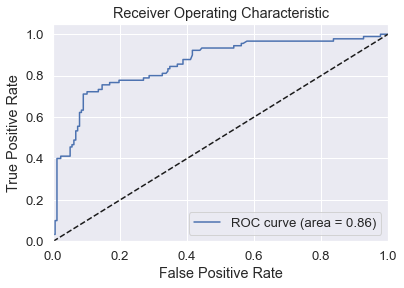

In [100]:
# import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the Adaboost classifier with the best parameters
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=3), algorithm='SAMME.R', random_state=49)

# Fit the classifier on the training data
adaboost.fit(X_train, y_train)

# Predict the probabilities for the test data
y_pred_prob = adaboost.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [102]:
print("AUC score:", roc_auc)

AUC score: 0.8576779026217228


Here I have plotted the ROC curve for the final model and the AUC value for this is 85.8%

# Saving The Model

In [104]:
# Let's save he best performing model

import joblib

# Instantiate the Adaboost classifier with the best parameters
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=3), algorithm='SAMME.R', random_state=49)

# Fit the classifier on the training data
adaboost.fit(X_train, y_train)

# Save the model
joblib.dump(adaboost, 'titanic_model.pkl')

['titanic_model.pkl']

We can predict new dataset with this saved model